Задание 2

In [4]:
import math
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [101]:
lb, gl = 1.5, 0
rb, gr = 2.5, 0
k1, k2, k3 = 80, 1, 20
x0 = lb+(rb-lb) / 3
# x0 = (lb+rb) / 2
x1 = lb + (rb-lb) * 2 / 3
# x1 = rb+5
h = (rb-lb) / 150   
c = 10

In [102]:
def a(x):
    if x <= x0:
        return k1
    elif x-h <= x0 < x:
        return h / ((x0-x+h) / k1 + (x-x0) / k2)
    elif x0 < x-h and x <= x1:
        return k2
    elif x-h < x1 <= x:
        return h / ((x0-x+h) / k2 + (x-x0) / k3)
    else:
        return k3
    

def b(x):
    if x + h <= x0:
        return k1
    elif x < x0 <= x + h:
        return h / ((x0-x) / k1 + (x+h-x0) / k2)
    elif x0 < x and x+h <= x1:
        return k2
    elif x-h < x1 <= x:
        return h / ((x0-x+h) / k2 + (x-x0) / k3)
    else:
        return k3
    
    
def phi(x, x0, c):
    if abs(x - x0) == h / 2:
        return c / 2
    elif 2*x - h < 2*x0 < 2*x + h:
        return c
    else:
        return 0

def second_task():
    n = int((rb-lb)/h) + 1
    matrix = np.zeros(shape=(n, n))
    terms = np.zeros(n)
    matrix [0, 0], terms[0] = 1, gl
    matrix[-1, -1], terms[-1] = 1, gr
    for i in range(1, n-1):
        xi = lb + i*h
        matrix[i, i-1] = a(xi)
        matrix[i, i] = -b(xi) - a(xi)
        matrix[i, i+1] = b(xi)
        terms[i] = -h * phi(xi, lb + (rb - lb) / 2, c)
    return np.linalg.solve(matrix, terms)

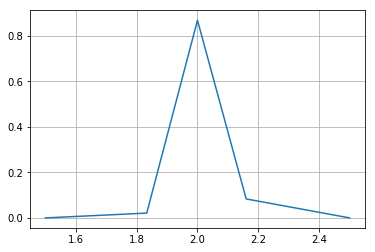

In [103]:
xs = np.arange(lb, rb+h, h)
plt.plot(xs, second_task())
plt.grid()
plt.show()

Задание 3


In [113]:
# t = 0.005
# h = 0.02
# phi = lambda x: -2*x**2+2*x+4.5
phi = lambda x: 3
k = lambda x: x ** (-1/3)
f = lambda x: x+x**0.5
a, g1 = 1.5, lambda t: 3
b, g2 = 2.5, lambda t: 3
h = 0.05
t = 0.001
T = 500*t

In [114]:
num_t = int(T / t) + 1
num_k = int((b - a) / h) + 1
matrix = np.zeros(shape=(num_t, num_k))

t = T/num_t
matrix [:, 0] = np.array([g1(t) for t in np.linspace(0, T, num_t)])
matrix[:,-1] = np.array([g2(t) for t in np.linspace(0, T, num_t)])

matrix[0,:] = np.array([phi(xi) for xi in np.linspace(a, b, num_k)])

for i in range(1, num_t):
    for j in range(1, num_k - 1):
        xj = a + j*h
        matrix[i][j] = sum([k(xj-h/2)*t/(h ** 2) * matrix[i-1][j-1],
                            (1 -(k(xj-h/2)+k(xj+h/2))*t/(h ** 2)) * matrix[i-1][j],
                            k(xj+h/2)*t/(h ** 2) * matrix[i-1][j+1],
                            t * f(xj)*(1-math.exp(-i*t))])
# print(matrix)
#print(num_t)
#print(num_k)

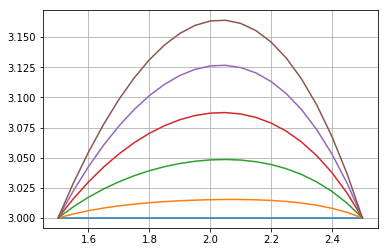

In [115]:
xs = np.array([a + i*h for i in range(num_k)])

for i in range(0, num_t, 100):
    plt.plot(xs, matrix[i], label=i)
    #print(matrix[i][-1])
plt.grid()
plt.show()

Задание 4

In [130]:
a = 0
b = 1
k = 1
T = 0.05
phi = lambda x: 1
g1 = lambda t: math.exp(t)
g2 = lambda t: math.exp(10*t)
f = lambda x, t: 0
h = (b-a) / 50
t = 0.5*((h**2) / k)

In [131]:
num_t = int(T / t) + 1
num_k = int((b - a) / h) + 1
matrix = np.zeros(shape=(num_t, num_k))


matrix [:, 0] = np.array([g1(ti) for ti in np.linspace(0, T, num_t)])
matrix[:,-1] = np.array([g2(ti) for ti in np.linspace(0, T, num_t)])

matrix[0,:] = np.array([phi(xi) for xi in np.linspace(a, b, num_k)])

coef = np.array([k * t / h**2, 1 - 2 * k * t / h**2, k * t / h**2]) # transpose

for i in range(1, num_t):
    for j in range(1, num_k - 1):
        matrix[i][j] = matrix[i - 1, j-1:j+2].dot(coef) + t * f(a+j*h, i*t)
        

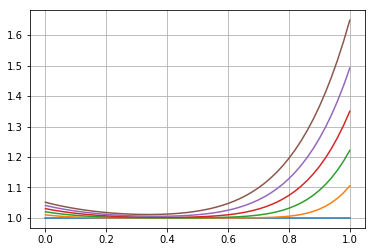

In [133]:
xs = np.array([a + i*h for i in range(num_k)])

for i in range(0, num_t, 50):
    plt.plot(xs, matrix[i], label=i)
plt.grid()
plt.show()